<a href="https://colab.research.google.com/github/zeberity123/nvidia-voice-audio-chatbot/blob/main/Audio_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/sukritima/audio-sentiment-analysis/notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import musdb
mus = musdb.DB(download=True)
mus[0].audio

array([[-8.84704590e-02, -3.79333496e-02],
       [-1.07421875e-01, -5.22460938e-02],
       [-8.42590332e-02, -5.48400879e-02],
       ...,
       [-8.23974609e-04,  3.05175781e-05],
       [-8.54492188e-04,  7.01904297e-04],
       [-8.54492188e-04,  1.31225586e-03]])

In [ ]:
print(type(mus[0]))

<class 'musdb.audio_classes.MultiTrack'>


In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Audio_Project'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())

  if len(paths) == 2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

9

In [ ]:
paths[:5]

['/content/drive/MyDrive/Audio_Project/Triviul - Dorothy.stem.mp4',
 '/content/drive/MyDrive/Audio_Project/03-01-04-01-01-02-06.wav',
 '/content/drive/MyDrive/Audio_Project/fear.wav',
 '/content/drive/MyDrive/Audio_Project/disgust.wav',
 '/content/drive/MyDrive/Audio_Project/happy.wav']

In [ ]:
labels[:5]

['triviul - dorothy', '03-01-04-01-01-02-06', 'fear', 'disgust', 'happy']

In [ ]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/Audio_Project/Triviul -...,triviul - dorothy
1,/content/drive/MyDrive/Audio_Project/03-01-04-...,03-01-04-01-01-02-06
2,/content/drive/MyDrive/Audio_Project/fear.wav,fear
3,/content/drive/MyDrive/Audio_Project/disgust.wav,disgust
4,/content/drive/MyDrive/Audio_Project/happy.wav,happy


In [ ]:
df['label'].value_counts()

label
triviul - dorothy       1
03-01-04-01-01-02-06    1
fear                    1
disgust                 1
happy                   1
sad                     1
neutural                1
ps                      1
angry                   1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

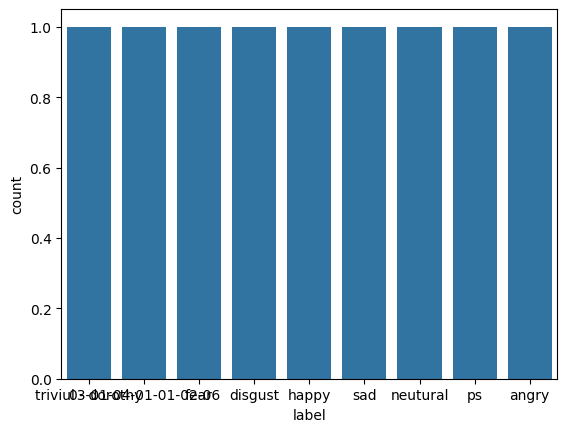

In [ ]:
sns.countplot(data=df, x='label')

In [ ]:
def waveplot(data, sr, emotion):
  plt.figure(figsize=(10, 4))
  plt.title(emotion, size=20)
  librosa.display.waveshow(data, sr=sr)
  plt.show()

In [ ]:
def spectogram(data, sr, emotion):
  x = librosa.stft(data)
  xdb = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion, size=20)
  librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
  plt.colorbar()

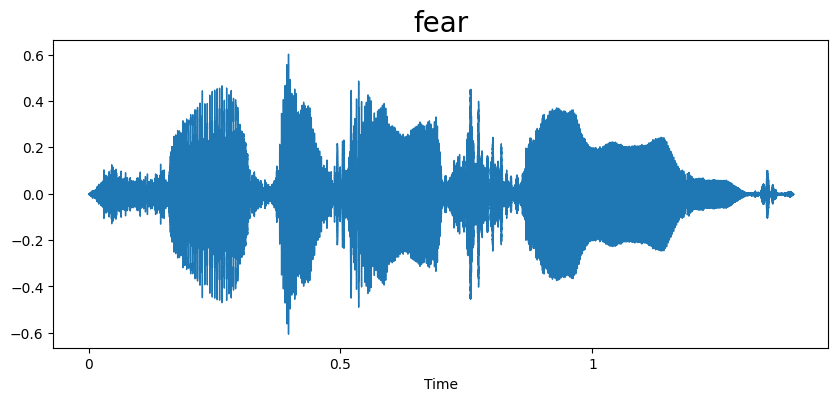

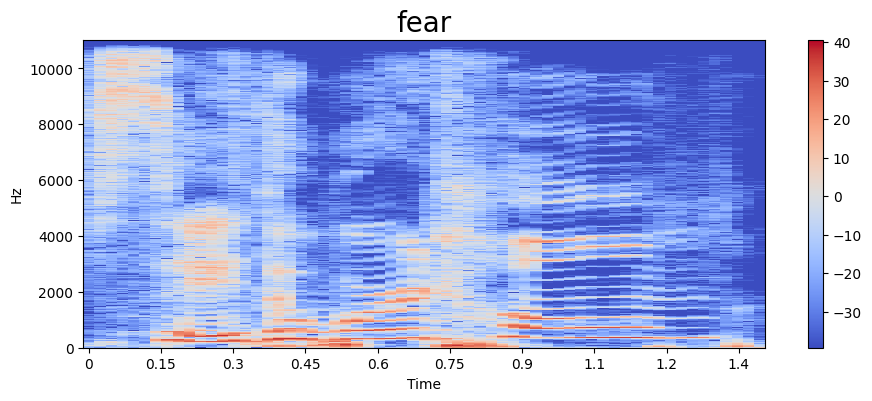

In [ ]:
emotion='fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate=  librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)